<h1>1. Introduction to the research space</h1>

<h3>1.1 Summary of research area</h3>

<p>This research is offers a novel way of understanding the issue of food supply in Singapore. It take into account of the number of Livestock Slaughtered and presents a graphical representation of how the Livestock Slaughtered changes over the years. It can assist in understanding the problem of food supply as the Livestock Slaughtered is one of the main source of fresh meat. This report should assits policy makers to gain a better understanding of the food security in Singapore.</p>

<h3>1.2 Aims and objectives</h3>
<p>This research project aims to understand the general trend of the food security in Singapore by analysing the supply of live stock from 2010 to 2021. While this may not be an accurate representation of the general food supply in Singapore, however, it offers a view of the local food security. Ideally, this research could help policymakers to understand the changes in the supply of meat and aid them in making policies concerning food. The research question is how the supply of live stock for food in Singapore changes over time.</p>

<h3>1.3 Acquire of dataset</h3>
<p>The information regarding the historical data on the Livestock Slaughtered was acquired from the official website of the Singapore Department of Statistics (SingStats) via web API. The code for web scrapping is shown below.</p>

In [1]:
#importing the relevent library
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<p>I have imported the above libraries for these following reasons:</p>
<p>requests library is used to initiate HTTP get request to the website so that the python program is able to scrape for the data</p>
<p>json library is used to load the data scraped from the website into text file so that it is readable by other parts of the program</p>
<p>pandas library is used as it is a common data analytic tool to process and handle data frames in python. It is used to write to and read from csv files that saves the data. It also handles and processes the data to a proper format.</p> 
<p>numpy library is used to handle calculations and make use of the numpy array for statistical calculation</p>
<p>The Matplotlib is used for ploting the data and represent it graphically after handled by numpy. </p>

In [2]:
#function to return the url for the data
def getRequesturl():
    url = "https://tablebuilder.singstat.gov.sg/api/table/tabledata/M890521"
    return url

In [3]:
#functions to scrap the singstats website for the data
def getApiData(requestUrl):
    response = requests.get(requestUrl)
    data = json.loads(response.text)
    poultry =  data["Data"]["row"][0]["columns"]
    chicken = data["Data"]["row"][1]["columns"]
    duck = data["Data"]["row"][2]["columns"]
    quail = data["Data"]["row"][2]["columns"]
    pigs = data["Data"]["row"][2]["columns"]

    return poultry, chicken, duck, quail, pigs

def getApiDataPoultry(requestUrl):
    response = requests.get(requestUrl)
    data = json.loads(response.text)
    poultry =  data["Data"]["row"][0]["columns"]
    return poultry

def getApiDataChickens(requestUrl):
    response = requests.get(requestUrl)
    data = json.loads(response.text)
    chickens =  data["Data"]["row"][1]["columns"]
    return chickens

def getApiDataDucks(requestUrl):
    response = requests.get(requestUrl)
    data = json.loads(response.text)
    ducks =  data["Data"]["row"][2]["columns"]
    return ducks

def getApiDataQuails(requestUrl):
    response = requests.get(requestUrl)
    data = json.loads(response.text)
    quails =  data["Data"]["row"][3]["columns"]
    return quails

def getApiDataPigs(requestUrl):
    response = requests.get(requestUrl)
    data = json.loads(response.text)
    pigs =  data["Data"]["row"][4]["columns"]
    return pigs

In [4]:
#scraping for poultry
requestUrl = getRequesturl()

poultry = getApiDataPoultry(requestUrl)
dfPoul = pd.DataFrame(poultry)
# dfPoul #uncomment to view the dataframe

In [5]:
#scraping for chicken
chicken = getApiDataChickens(requestUrl)
dfChick = pd.DataFrame(chicken)
# dfchick #uncomment to view the dataframe

In [6]:
#scraping for Duck
ducks = getApiDataDucks(requestUrl)
dfDuck = pd.DataFrame(ducks)
# dfduck #uncomment to view the dataframe

In [7]:
#scraping for Quails
quail = getApiDataQuails(requestUrl)
dfQuail = pd.DataFrame(quail)
# dfquail #uncomment to view the dataframe

In [8]:
#scraping for pig
pigs = getApiDataPigs(requestUrl)
dfPig = pd.DataFrame(pigs)
# dfpig #uncomment to view the dataframe

<p> The data acquired are saved in CSV files. (note, in case the website brokes down or prohibits web scrapping in the future, a backup of the files is available in the data folder. At the time of writing, both copies of data are identical.) Please run the code that is commended out below to continue if the website is unavaliable.</p>

In [9]:
#save to csv
dfPoul.to_csv("poul.csv")
dfChick.to_csv("chick.csv")
dfDuck.to_csv("duck.csv")
dfQuail.to_csv("quail.csv")
dfPig.to_csv("pig.csv")

########## The code below are for the backup incase the website fails###########
# #read from saved files
# dfPoul=pd.read_csv("data/poul.csv")
# dfChick=pd.read_csv("data/chick.csv")
# dfDuck=pd.read_csv("data/duck.csv")
# dfQuail=pd.read_csv("data/quail.csv")
# dfPig=pd.read_csv("data/pig.csv")

</br>

<h3> 1.4 Exploratory data analysis</h3>

<p>In the exploratory data analysis, I am finding the maximum value of the particular Livestock Slaughtered and the corresponding year. I am also finding the possible none values.</p>

<p>notation used in the website: <img src="img/notation.jpg" alt="original data in singstats" width="200" height="200"> </p>

<p>The picture above is a screen shot of the Singstats, it mentions the notation they use when the data is missing. With referece to this picture, the possible none values to be find will be "na", "nec", "nes" and "-"</p>

<h4>Exploratory data analysis for Chicken:</h4>

In [10]:
max=dfChick[dfChick['value']==dfChick['value'].max()]#check for max value
min_year=dfChick[dfChick['key']==dfChick['key'].min()]#check for starting year


none1=dfChick[dfChick.isna().any(axis=1)]#check for na value
none2=dfChick.loc[dfChick['value'].isin(['na', 'nec', 'nes', '-'])]#possible none values

#print the output
print("max number slaughtered:")
display(max)

print("starting year:")
display(min_year)

print("none value(s):")
display(none1,none2)

max number slaughtered:


,key,value
25,2018,51400


starting year:


,key,value
0,1993,35506


none value(s):


,key,value


,key,value


<h4>Exploratory data analysis for Duck:</h4>

In [11]:
max=dfDuck[dfDuck['value']==dfDuck['value'].max()]#check for max value
min_year=dfDuck[dfDuck['key']==dfDuck['key'].min()]#check for starting year

none1=dfDuck[dfDuck.isna().any(axis=1)]#check for na value
none2=dfDuck.loc[dfDuck['value'].isin(['na', 'nec', 'nes', '-'])]#possible none values

#print the output
print("max number slaughtered:")
display(max)

print("starting year:")
display(min_year)

print("none value(s):")
display(none1,none2)

max number slaughtered:


,key,value
7,2000,7428


starting year:


,key,value
0,1993,6318


none value(s):


,key,value


,key,value


<h4>Exploratory data analysis for Quail:</h4>

In [12]:
max=dfQuail[dfQuail['value']==dfQuail['value'].max()]#check for max value
min_year=dfQuail[dfQuail['key']==dfQuail['key'].min()]#check for starting year


none1=dfQuail[dfQuail.isna().any(axis=1)]#check for na value
none2=dfQuail.loc[dfQuail['value'].isin(['na', 'nec', 'nes', '-'])]#possible none values

#print the output
print("max number slaughtered:")
display(max)

print("starting year:")
display(min_year)

print("none value(s):")
display(none1,none2)

max number slaughtered:


,key,value
7,2019,85


starting year:


,key,value
0,2012,80


none value(s):


,key,value


,key,value


<h4>Exploratory data analysis for Pigs</h4>

In [13]:
max=dfPig[dfPig['value']==dfPig['value'].max()]#check for max value
min_year=dfPig[dfPig['key']==dfPig['key'].min()]#check for starting year


none1=dfPig[dfPig.isna().any(axis=1)]#check for na value
none2=dfPig.loc[dfPig['value'].isin(['na', 'nec', 'nes', '-'])]#possible none values

#print the output
print("max number slaughtered:")
display(max)

print("starting year:")
display(min_year)

print("none value(s):")
display(none1,none2)

max number slaughtered:


,key,value
5,2020,431


starting year:


,key,value
0,2015,334


none value(s):


,key,value


,key,value


<p>From the analysis above, I can conclude that the number of livestock slaughtered is generally in an increasing trend(except for duck). There is no na or none values in any of the data gathered, however, the data starts at different year. </p>

</br>

<h1>2. Justification of the relevance of data to the aims/objective and use of data source</h1>

<h3>2.1 Origin of the data</h3>

<p>The data is originate from the official website of the Singapore Department of Statistics (<a href="https://www.singstat.gov.sg/)">link to Singstat</a>). It offers a service called the SingStat Table Builder where the statistics in Singapore are displayed. The data chosen was the yearly data of Livestock Slaughtered in Singapore (<a href="https://tablebuilder.singstat.gov.sg/table/TS/M890521)">link to data</a>).
    
Web API is used to retrieve the JSON(JavaScript Object Notation) file of the data. The .json file can be found <a href="https://tablebuilder.singstat.gov.sg/api/table/tabledata/M890521">here</a>. The method of retriving the similar to that of week 10's lecture. 
</p>

<h3>2.2 Appropriateness of the data</h3>

<p>This data is appropriate as it offers an overview of the food supply in Singapore in terms of meat. The data also covers majority sources of the meat consumed in Singapore. The Livestock Slaughtered shows an insight of the meat supply to the local market. The number of Livestock Slaughtered influence the supply of meat greatly as it is one of the main source of fresh meat avaliable locally. 
    
On the other hand, the data is published by the Singapore Department of Statistics citing the source as "AGRI-FOOD AND VETERINARY AUTHORITY, SINGAPORE FOOD AGENCY". All parties involved are part of the Singapore government, making the source credible.</p>

<h3>2.3 Case for working with this data</h3>

<p>original data from website: <img src="img/original.jpg" alt="original data in singstats" width="500" height="600"> </p>

<p>The image above shows the original data in the Singstats website. With reference to the research question mentioned in section 1.2. The rows concerning the analysis of the research questions are the Poultry, Chickens, Ducks, Quails and Pigs. The data in these rows shows the net number in thousands of the respective livestock slaughted. It answers the the changes in the supply of livestocks. The columns from 1993 to 2021 shows the time that the data is collected. This answers the part on how the data changes with respect to time.</p>

<p>As for the current dataframe used, I will use that of the poultry (dfPoul) as an example. The other dataframes are of similar structure.</p>

In [14]:
display(dfPoul)

,key,value
0,1993,41824
1,1994,43012
2,1995,37429
3,1996,42505
4,1997,45514
5,1998,47391
6,1999,52215
7,2000,50155
8,2001,50213
9,2002,51721


<p>The column heading "key" in the dataframe shown above refers to the year which the data is gathered. While the column heading "value" refers to the number of this particular livestock slaughtered. The current headings are identical for all other dataframes</p>

</br>

<h3>2.4 Formating the data </h3>

<p> The current five dataframes (dfPoul, dfChick, dfDuck, dfQuail, dfPig) will be combined into one dataframe for the easy of analysis. The dataframe dfPoul will be discarted as it is not a representative of a particular livestock.<p>

<p> I will rename the column of each dataframe to a unique name and then combine them into one dataframe. </p>

In [15]:
#dataframe changed and reindexed to regroup 
#renaming df for chicken
dfChick. rename(columns = {'key':'year', 'value':'chi_num'}, inplace = True)
dfChick=dfChick.set_index('year')

#renaming df for duck
dfDuck. rename(columns = {'key':'year', 'value':'duck_num'}, inplace = True)
dfDuck=dfDuck.set_index('year')

#renaming df for quail
dfQuail. rename(columns = {'key':'year', 'value':'qui_num'}, inplace = True)
dfQuail=dfQuail.set_index('year')

#renaming df for pig
dfPig. rename(columns = {'key':'year', 'value':'pig_num'}, inplace = True)
dfPig=dfPig.set_index('year')

In [16]:
#create new dataframe for everything
frames = [dfChick, dfDuck, dfQuail, dfPig]
df_livestock = pd.concat(frames,axis=1).reindex(dfChick.index)

#store data as csv
df_livestock.to_csv("livestock.csv",index=False)
display(df_livestock)

,chi_num,duck_num,qui_num,pig_num
year,,,,
1993,35506,6318,NaN,NaN
1994,35956,7056,NaN,NaN
1995,31264,6166,NaN,NaN
1996,36312,6193,NaN,NaN
1997,38631,6884,NaN,NaN
1998,41124,6268,NaN,NaN
1999,44858,7357,NaN,NaN
2000,42727,7428,NaN,NaN
2001,43484,6729,NaN,NaN


<p>The data is now in one panda dataframe which is suitable for analysis</p>

<p>A CSV file from the website is also dowloaded to double check the accuracy of the data scapped

In [17]:
download=pd.read_csv("data/M890521-table.csv")
download

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,Theme: Industry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Subject: Agriculture, Animal Production and Fi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Topic: Food Supply,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Table Title: Livestock Slaughtered, Annual",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Data last updated: 20/06/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"Source: AGRI-FOOD AND VETERINARY AUTHORITY, SI...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thousand
9,Data Series,2021.0,2020.0,2019.0,2018.0,2017.0,2016.0,2015.0,2014,2013,...,2002,2001,2000,1999,1998,1997,1996,1995,1994,1993


<h3> 2.5 Comparison of other data avaliable</h3>

<p>During the ideation phase of this project, I have also considered a range of other data sets available. In particular, the Singapore Food Statistics from Singapore Food Agency (<a href="https://www.sfa.gov.sg/files/SingaporeFoodStatistics/SFA_SingaporeFoodStatistics1/mobile/index.html">link to data</a>) and Local Production And Local Landings by the Department of Statistic Singapore(<a href="https://tablebuilder.singstat.gov.sg/table/TS/M890721)">link to data</a>). </p>

<p>The Singapore Food Statistics provides more in-depth analyzed data on food supply in Singapore. It contains more indicators to analyze and thus gives a bigger picture of the issue. However, it is a complete report on a yearly basis. It is difficult to get the data as the arrangement of the report differs year to year.</p>

<p>The Local Production And Local Landings are from the same authority in my analysis. It is equally detailed and credible. However, Singapore is a tiny city-state with little emphasis on local agriculture and farm production. The local production of food is insignificant compared to that of locally slaughtered livestock which is mostly imported.</p>

</br>

<h1>3. Background Analysis</h3>

<h3>3.1 Reason for choosing the topic</h3>

<p>Singapore has always been a resource-poor country due to its limited size. She is heavily reliant on imports even daily necessities like food and water. The current supply chain disruption has worsened the matter as one of its main supplier of chicken, Malaysia, has decided to stop the export of the bird due to shortage in supply (source:<a href="https://apnews.com/article/russia-ukraine-politics-global-trade-malaysia-4188e124f886aeea8549f3bb363b3d3b">AP NEWS, 2022</a>). Singapore has responded by importing chicken from other sources, however, the price of chicken and eggs still risen locally (source:<a href="https://www.channelnewsasia.com/singapore/week-malaysia-chicken-export-ban-stalls-close-solutions-2734541">CNA, 2022</a>). Singapore imports morethan 90% of its food while trying to maintain food security for it's citizens. The gloabl supply chain disruption has made the matter worse (source:<a href="https://fortune.com/2021/05/29/singapore-fake-meat-plant-based-protein-cultured-meat-eat-just-food-security/">WILLIS, 2022</a>)</p>
</br>
<p>Personally, I have felt the rise in food and beverages in eateries and school canteens. Thus I have decided to conduct a study on the supply of food in Singapore, in particular, the supply of meat.</p>

<h3> 3.2 Uniqness of topic</h3>

<p>There has being an established relationship between the livestock slaughted and the food security (source:<a href="https://www.researchgate.net/publication/276308353_Food_Security_The_Contribution_of_Livestock">(Falvey, 2015)</a>). However, there has been little to no research in Singapore's context. Except for the <a href="https://www.sfa.gov.sg/files/SingaporeFoodStatistics/SFA_SingaporeFoodStatistics1/mobile/index.html">Singapore Food Statistics</a>  discussed in section 2.5 which covers many indicators. Thus, this could be very novel research on drawing the link between food security and the livestock slaughtered.</p>

<h5>Reference</h5>

<p> Falvey, J., 2015. Food Security: The Contribution of Livestock. [online] ResearchGate. Available at: 
    https://www.researchgate.net/publication/276308353_Food_Security_The_Contribution_of_Livestock [Accessed 23 June 2022]. </p>
<p>WILLIS, S., 2022. Can a country with no livestock become a meat producer? Singapore is going to try. [online] Fortune. Available at: https://fortune.com/2021/05/29/singapore-fake-meat-plant-based-protein-cultured-meat-eat-just-food-security/ [Accessed 22 June 2022].</p>

<P>AP NEWS. 2022. Distress in Singapore as Malaysia bans chicken export. [online] Available at: https://apnews.com/article/russia-ukraine-politics-global-trade-malaysia-4188e124f886aeea8549f3bb363b3d3b [Accessed 23 June 2022].</P>

<P>CNA. 2022. A week into Malaysia's chicken export ban: Some stalls in Singapore close while others find solutions. [online] Available at: https://www.channelnewsasia.com/singapore/week-malaysia-chicken-export-ban-stalls-close-solutions-2734541 [Accessed 25 June 2022].</P>

<h3>3.3 Scope of work</h3>

<p>This research will analyse how the livestock slaughtered in Singapore changes with respect to time. This research will not cover any prediction of future number of livestock slaughtered nor draw immediate conclusion to how the number of livestock slaughtered affects the cost of food. These two area could be explored in the future researches.</p>

<p>This research will also only focus on the changes in livestock slaughtered from 2010 to 2021 and will disregard the rest of the data</p>

<h3>3.4 Analytical pipeline</h3>

<p>This project first involves web scrapping data from the Singapore Department of Statistics. Then, I will do a short empirical analysis of the data to gain insight into its structure. Then I will proceed to clean the data to validate variables. Finally, I will drop graphical representations of the data to understand the trend and aid the policymakers in their decisions. </p>

<h3>3.5 Method of evaluation of success</h3>

<p>As this project aims to understand the general trend of the food security in Singapore by analyzing the supply of livestock, the final output will be deemed a success if it gives a clear and understandable graphical representation of the data collected.</p>

<h1>4. Exploration of data</h1>

<h3>4.1 removing illegal values</h3>

<p>Before conducting data analysis, the data gathered need to be cleaned first. The code below shows how the illegal values insdie the dataframe is remove and replaced. </p>

In [18]:
#replace NaN value with 0
df_livestock=df_livestock.fillna(0)

display(df_livestock)

,chi_num,duck_num,qui_num,pig_num
year,,,,
1993,35506,6318,0,0
1994,35956,7056,0,0
1995,31264,6166,0,0
1996,36312,6193,0,0
1997,38631,6884,0,0
1998,41124,6268,0,0
1999,44858,7357,0,0
2000,42727,7428,0,0
2001,43484,6729,0,0


<h3>4.2 Remove out of bound data</h3>

<p>As the research question and the aim only targets year 2010 to 2021, all other year's data will be removed</p>

In [19]:
df_livestock.drop(["1993","1994","1995","1996","1997","1998","1999", "2000","2001",
                   "2002","2003","2004","2005","2006","2007","2008","2009"], axis=0, inplace=True)

In [20]:
display(df_livestock)

,chi_num,duck_num,qui_num,pig_num
year,,,,
2010,44659,6317,0,0
2011,46193,5947,0,0
2012,46099,5896,80,0
2013,47036,6012,62,0
2014,46154,6084,83,0
2015,48008,5601,100,334
2016,48820,5489,111,333
2017,48323,5177,72,323
2018,51400,5429,103,306


<h3>4.3 Formatting data</h3>

<p> The data will be left in dataframe to allow ploting of graph later. The data will also be copied and coverted to numpy arrray for statistical calculation. The values within the numpy array is also changed to integer allow the calculation and comparison of nunbers.
    
The code is shown below:</p>

In [21]:
#changing to array
ls_array=df_livestock.to_numpy()

#array for chicken
chicken=([])
for i in range(0,len(ls_array)):
    chicken=chicken+[int(ls_array[i][0])]

#array for duck
duck=([])
for i in range(0,len(ls_array)):
    duck=duck+[int(ls_array[i][1])]
    
#array for quail
quail=([])
for i in range(0,len(ls_array)):
    quail=quail+[int(ls_array[i][2])]
    
#array for pig
pig=([])
for i in range(0,len(ls_array)):
    pig=pig+[int(ls_array[i][3])]
    
#create new array for the years (old one used for index)
year = np.array(list(range(2010, 2022)))
year

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021])

<h3> 4.4 Insights from data</h3>

<p>The code below shows the standard deviation over the years for each type of meat.</p>
<p>The larger the value of standard deviation, the larger the spread of data</p>
<p>This means that the spread of data is the largest for chicken. It could be a significant increase or decrease in number over the years.</p>
<p>The smallest value is from quail, this means that it has the smallest spread of data. This could be due to the relatively small data size making it insignificant as compared to other types of meat. </p>

In [22]:
#standard deviation of number of chicken
np.std(chicken)

2150.4736477627953

In [23]:
#standard deviation of number of duck
np.std(duck)

418.574532059571

In [24]:
#standard deviation of number of quail
np.std(quail)

34.41131919716082

In [25]:
#standard deviation of number of pig
np.std(pig)

178.4154795227514

<h1>5. Ethics of use of data</h1>

<h3>5.1 Origin of data</h3>

<p>As stated above, the data is retrived from the Singapore Department of Statistics using a web API. The two images below show the terms and conditions of usage of API and the requirement for Intellectual property. I am using this data for a study purpose and using the web API for a non-commercial use. During the analysis, I did not inlcude any personal data through the API and the intellectual property has been refered to properly</p>

<p>Terms and condition: <img src="img/tnc.jpg" alt="terms and condition" width="500" height="600"> </p>

<p>Intellectual property: <img src="img/ip.jpg" alt="Intellectual property" width="500" height="600"> </p>

<p>The use of web scrapping is allowed in the website for Singstats as shown in the <a href="https://tablebuilder.singstat.gov.sg/robots.txt">https://tablebuilder.singstat.gov.sg/robots.txt</a>, all User-agent are allowed to scrape data from this website.(The screenshot is attached below)

<p>robots.txt in the website showing allow for web scrapping: <img src="img/robots.jpg" alt="Intellectual property" width="500" height="600"> </p>

<h3>5.2 Usage and reusage of data</h3>

<p>The data analysis has the potential to create new forms of intellectual property. The compiled and cleaned csv files could be used for machine learning and linear regression for future projects. </p>

<h3>5.3 Implication of utilising the data for purpose</h3>

<p>This research assumes that the consumption of meat is a necessity for everyone. However, this could be uncomfortable for people whose religion requires them to be Vegetarian/Vegan. This research potentially discriminate against them and did not consider them as part of society. This could be a dangerouse assumption as Singapore is a multi-religion society, a discrimination agaist one group could spark disturbance to society. </p>

<h3> 5.4 Security of data</h3>

<p>One negative side of this research is that the data is not encrypted nor secured during the data analysis. It is readily accessible in the Jupyter notebook. Anyone could access the data. This could lead to potential data leaks for this project.

On the flip side, the data is anonymous as it does not involve nor contain information about any particular person or company.</p>

<h3>5.5 Potential biases</h3>

<p> As mentioned above, this data assumes that the consumption of meat is a necessity for people living in Singapore. However, only 42% of the population here are meat-eaters and 39% are flexitarian. There are also 7% of vegetarian/vegan (source:<a href="https://www.statista.com/statistics/1102014/singapore-dietary-preferences/">statista</a>). This research did not consider their presence in society when using the number of livestock slaughtered to analyze the general food supply. Better research should consider a range of commonly eaten food/dishes.</p>

<h1>6. Data analysis</h1>

<h3> 6.1 plotting of graph </h3>

<p>To have a clearer view of the data, the following graphs are drawn

<p>Plot for changes in chicken:</p>

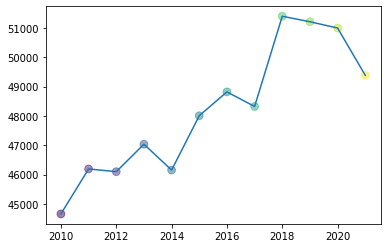

In [26]:
x = year
y_c= chicken
colors = year%255
area = 60

plt.scatter(x, y_c,s=area, c=colors, alpha=0.5)
plt.plot(x,y_c)
plt.show()

<h4>Findings:</h4> <p> The number of chicken slaughtered has been steadily increasing with some fluctuation over the years. This could mean that their is an increase in supply of chicken in the market in Singapore. However, the number has being decreasing dramatically in 2021, this could be due to the stricter testing for import raw material during covid-19</p>

<p>Plot for changes in duck:</p>

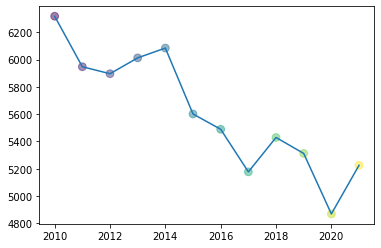

In [27]:
x = year
y_d= duck
colors = year%255
area = 60

plt.scatter(x, y_d,s=area, c=colors, alpha=0.5)
plt.plot(x,y_d)
plt.show()

<h4>Findings:</h4> <p>The number of duck slaughtered has been decreasing with significatant fluctuation. It raised up to second highest in 2014 after decreasing for years. However, the general trend is still decreasing. </p>

<p>Plot for changes in quail:</p>

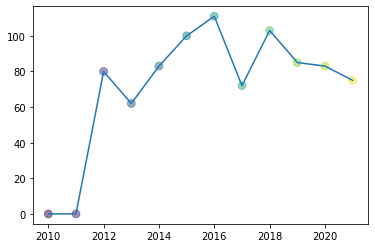

In [28]:
x = year
y_q= quail
colors = year%255
area = 60

plt.scatter(x, y_q,s=area, c=colors, alpha=0.5)
plt.plot(x,y_q)
plt.show()

<h4>Findings:</h4> <p>The number of quail slaughtered has not being changing rapidly over the years. The overall supply of quail is also insignificant. This could be due to that quail is not the main source of meat in Singapore</p>

<p>Plot for changes in pig:</p>

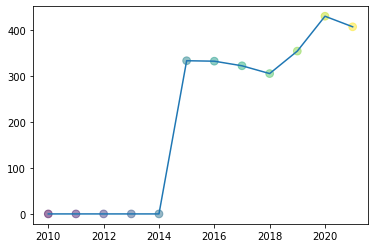

In [29]:
x = year
y_p= pig
colors = year%255
area = 60

plt.scatter(x, y_p,s=area, c=colors, alpha=0.5)
plt.plot(x,y_p)
plt.show()

<h4>Findings:</h4> <p>There wasnt any pig slaughtered in Singapore until 2014. It is generally stable with some fluctuations. It reaches its peak in 2020 during the pandanmic. This could be due to an increase in home cook food during lockdown</p>

<p>Comparison plot for all livestocks togather(livestocks labelled in diffferent colours, refer to the comment for the colour)</p>

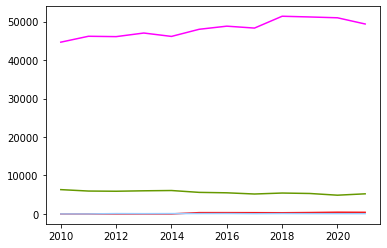

In [30]:
plt.plot(x,y_p, color='#ff0000')#pig red
plt.plot(x,y_q, color="#99ccff")#quail blue
plt.plot(x,y_d, color="#669900") #duck green
plt.plot(x,y_c, color="#ff00ff") #chicken pink
plt.show()

<h4>Findings:</h4> <p>The Number of chicken slaughtered is significantly higher than any other kind of meat. The number of pig slaughtered is much high than duck and quail but still significantly less than that of chicken</p>

<h3>6.2 Problem with data</h3>

<p>The overall data is extremely imbalanced. The dataset for chicken is a few magnitude higher than the other kinds of meat. This makes the comparison difficult using simple graphs.</p>

<h3>6.3 Insights, evaluation and conclusion</h3>

<p>This research found out that the main supply of meat in Singapore is very likely to be chicken as the number of chicken slaughtered is a few magnitude higher than other kinds of meat.</p>

<p>Policy makers should consider diversify the source of fresh meat in Singapore, one way is to start producing/slaughtering other sources of meat such as beef and fish locally. Another way is to invest in meatless meat/impossible meat where planet based ingredients were made into meat-like food.</p>

<p>The number of livestock slaughtered varys siginificantly over the years. However, They are generally in an increasing trend. This is a possitive news for the policy maker in Singapore as this ensure the food security locally to a large extent. Even there is limited food produced locally, increasing the mumber of livestocks slaughtered locally will enhance the position of Singapore in the supply chain of the food. Making the nation more durable at the time of crisis</p>

<h3>6.4 Evaluation of flaws</h3>

<p>The ideation of this project has an inherent flaw as it only considers the consumption of locally slaughtered meat. This is an overly simplification of the issue of food security. Firstly, there are other sources of meat such as frozen meat slaughtered elsewhere as well as processed meat. These are all some examples of substitutes for locally slaughtered meat.  Moreover, as I mentioned before in this report, there are also other variances in food such as vegetables and rice. Only considering locally slaughtered meat will give an inaccurate representation of the overall food supply and security in Singapore. Policymakers should consider other factors and indicators as well during the decision-making process of things related to food to gain a better understanding.</p>